## Klasyfikacja ręcznie pisanych liczb - MNIST

Po wykonaniu poprzedniego zadania zleceniodawca znów zadzwonił do Ciebie z kolejnym zadaniem. Okazuje się, że nie wszystkie informacje trafiły do zbioru Tytanic. Brakowało w nim między innymi informacji o pokojach w których mieszkali pasażerowie. Wszystkie informacje o miejscu spania były bowiem zapisane odręcznie na kartkach. Tajemniczy  więc zlecił Ci nowe zadanie... **Stworzenie konwolucyjnej sieci neuronowej rozpoznającej ręcznie pisane cyfry.**

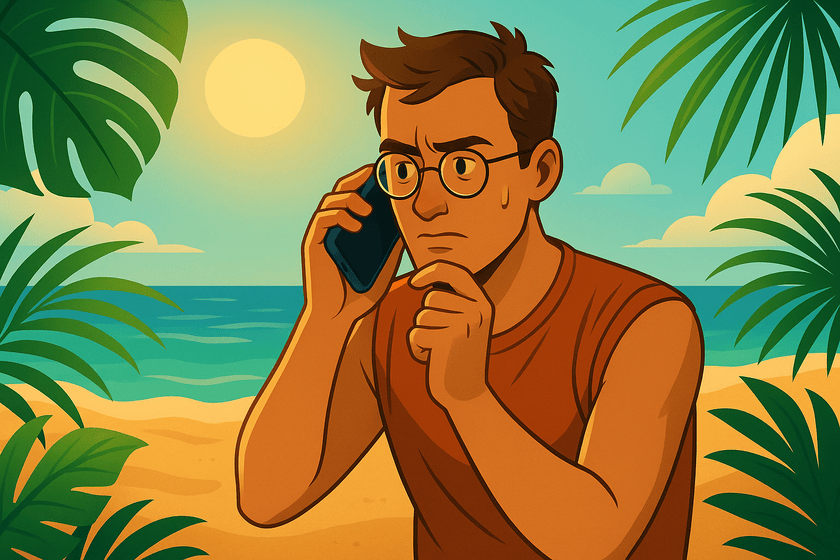

(*AI-generated image*)


#### Twoim celem będzie jest wytrenowanie modelu widzenia komputerowego (CNN) do klasyfikacji każdej ręcznie pisanej liczby z jak najlepszą dokładnością.

Poniżej znajdziesz pytania, które mogą być pomocne w zadaniu:

- Co mój model robi i w jaki sposób?
- Na czym skupia się mój model?
- Jakie liczby mój model myli? Dlaczego?
- Jak uodpornić mój model?
- Jaki wynik klasyfikacji możemy uznać za *dobry*?


Wymagania:
- Wypisz obserwacje z pierwszego zadania, które pomogą Ci w tym. Co było przydatne, a co okazało się bezużyteczne?
- Stwórz baseline, czyli dla porównania sprawdź jak z zadaniem radzi sobie zwykła sieć (nie musi być na wszystkich próbkach - zajmie to długo)
- W badaniach użyj wybranych metryk. Wybór uzasadnij.
- Spróbuj dobrać strukture sieci (szerokość i wysokość) i sprawdź jaki ma wpływ na dokładność
- Ćwiczenie: zmień liczbę kanałów/warstw, dodaj BatchNorm, spróbuj zwiększyć/zmniejszyć dropout.
- Wypisz wnioski.
- Korzystaj z `PyTorch` (`torch, torchvision`)

Niezmiennie, zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

In [60]:
# ładowanie zbioru danych
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Normalizacja danych o pixelach obrazka do liczb w przedziale od 0 do 1 w celu ułatwienia uczenia dla modelu

In [57]:
baseline = tf.keras.models.Sequential()
baseline.add(tf.keras.layers.Flatten())
baseline.add(tf.keras.layers.Dense(2,activation=tf.nn.relu))
baseline.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
baseline.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseline.fit(x_train, y_train, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3089 - loss: 1.8676


# Nie wiedziałem jak ma wyglądać baseline więc stworzyłem NN posiadający bardzo małą liczbę neuronów

In [58]:
val_loss, val_acc = baseline.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4777 - loss: 1.3963
1.3487861156463623 0.491100013256073


In [59]:
base_predict = baseline.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


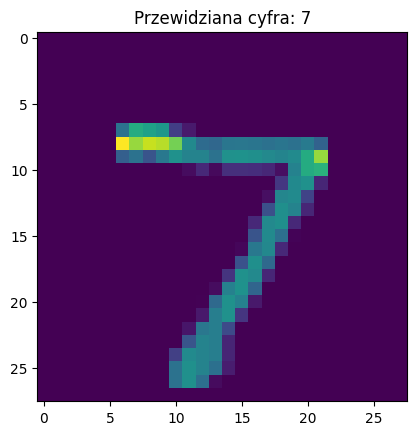

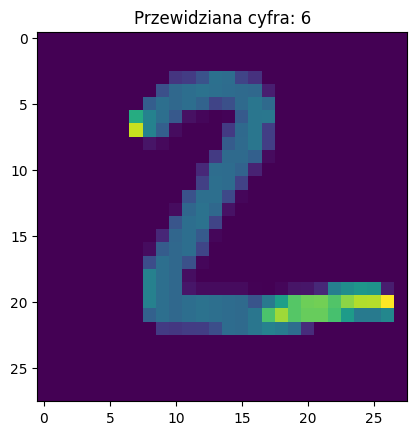

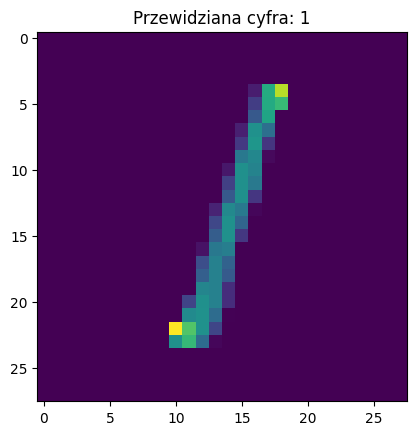

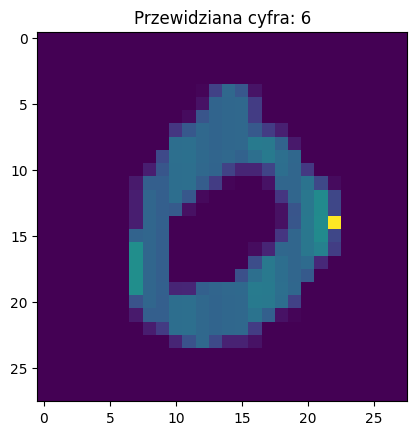

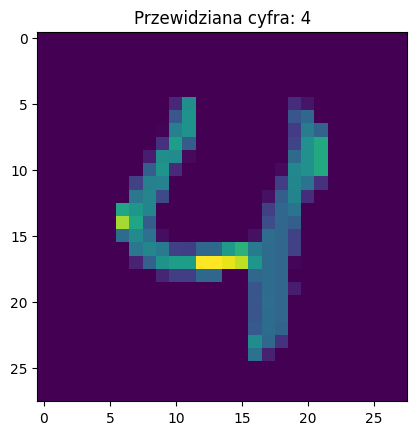

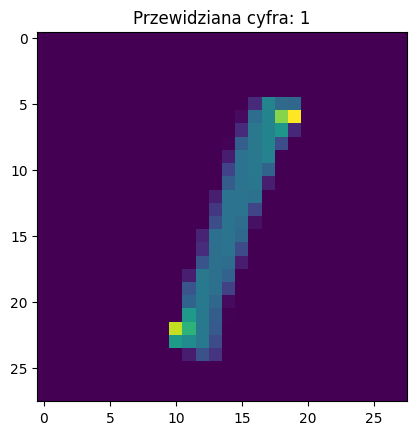

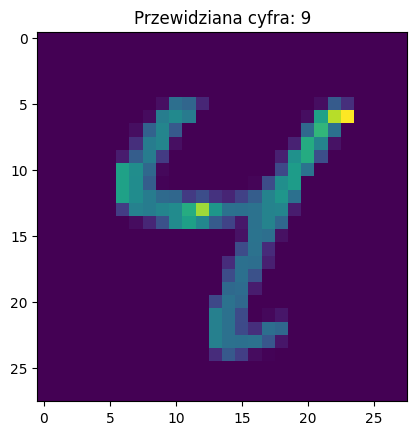

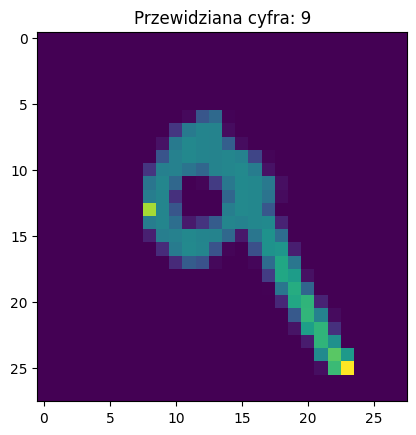

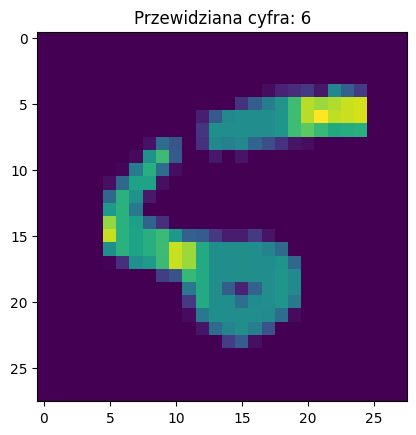

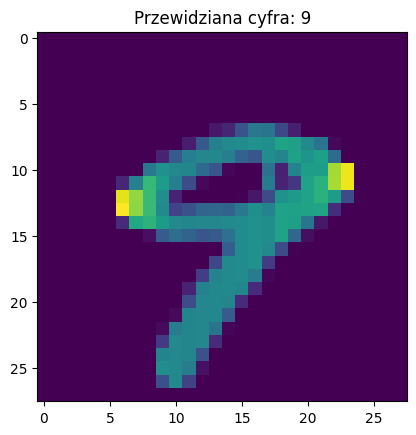

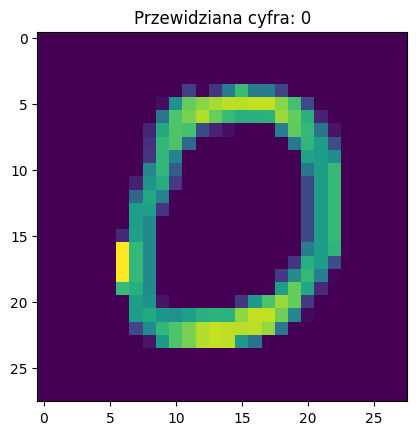

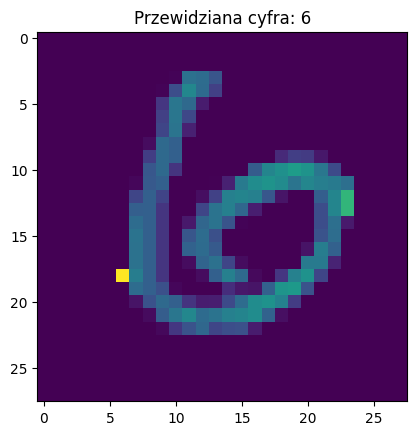

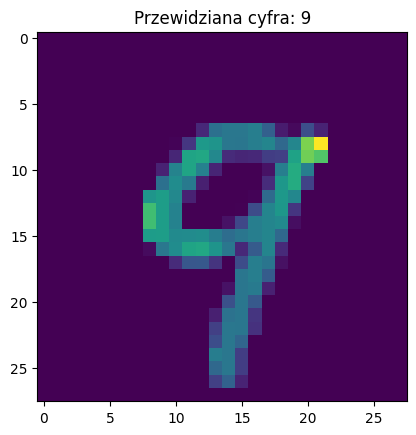

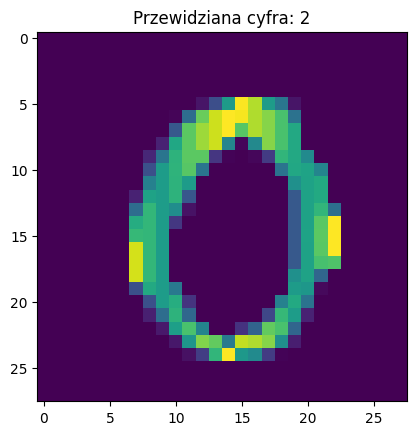

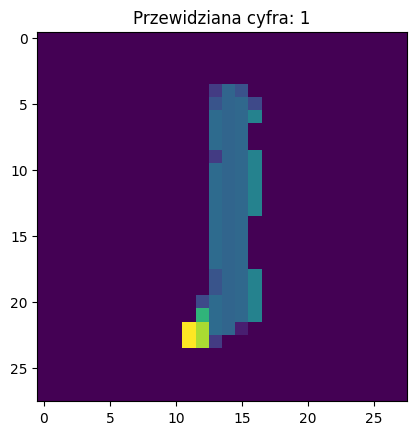

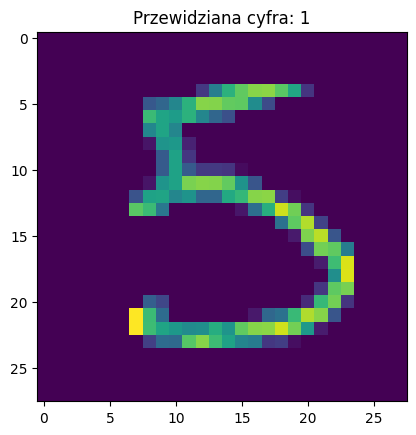

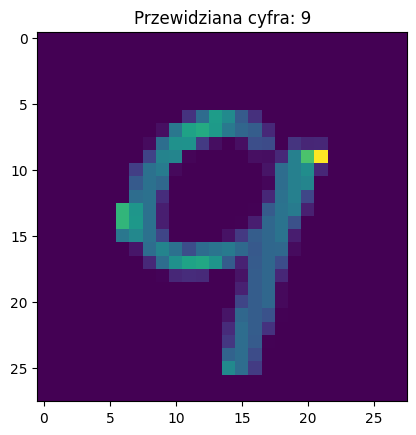

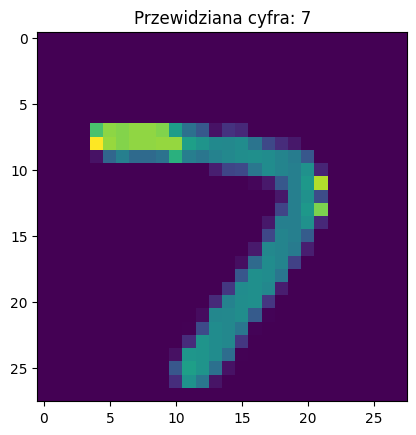

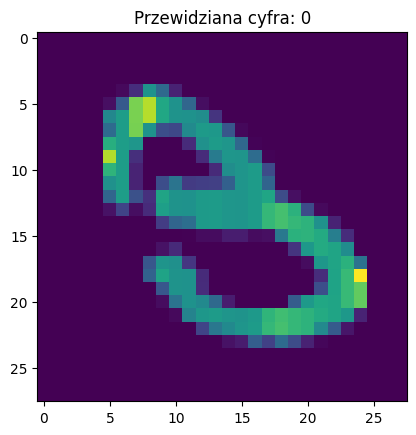

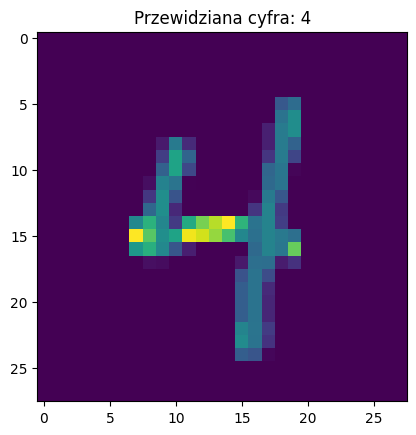

In [62]:
for x in range(0, 20):
      plt.title(f"Przewidziana cyfra: {np.argmax(base_predict[x])}")
      plt.imshow(x_test[x])
      plt.show()

# Nasz baseline jak widać nie jest super dokłady, co było pokazane w jego kalkulacjach dokładności, teraz stworzymy NN która będzie mądrzejsza

In [17]:
model = tf.keras.models.Sequential() #Tworzenie modelu
model.add(tf.keras.layers.Flatten()) #Spłaszczanie tabeli wielowymiarowej

In [18]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Tworzenie warstw sieci neuronowej, 2 pierwsze przetwarzają dane ostatnia służy jako output layer

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=3) #Trenowanie modelu

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8619 - loss: 0.4822
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9640 - loss: 0.1166
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0717


In [27]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1033
0.08702685683965683 0.9725000262260437


# Sprawdzanie czy nasz model faktycznie nauczył się rozpoznawać cyfry czy tylko zaczął rozpoznawać schematy niektórych cyfr

In [40]:
predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


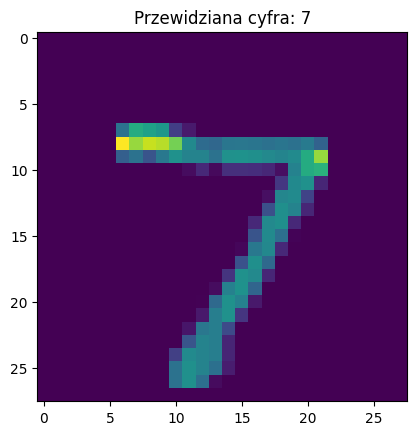

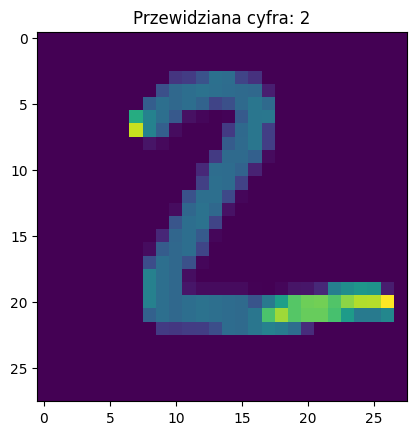

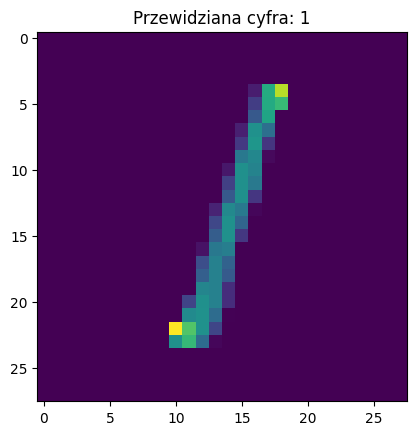

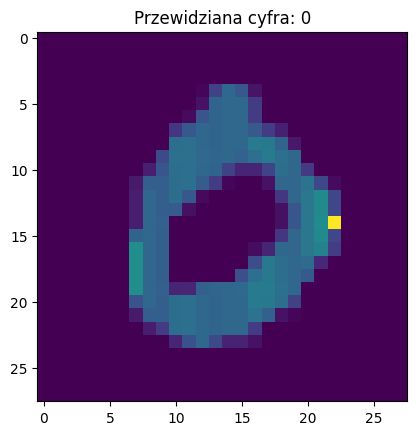

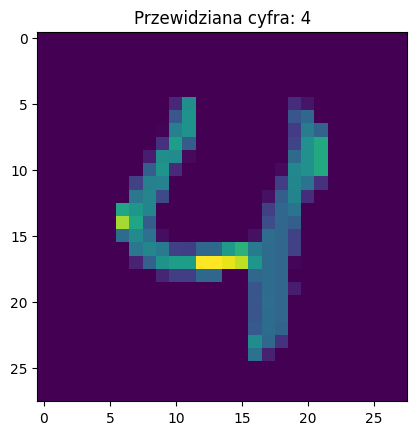

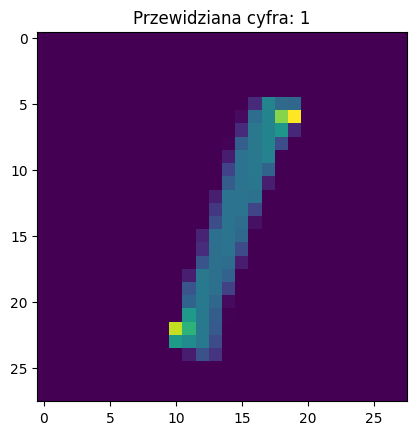

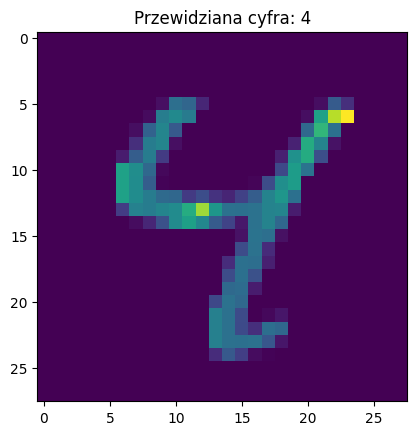

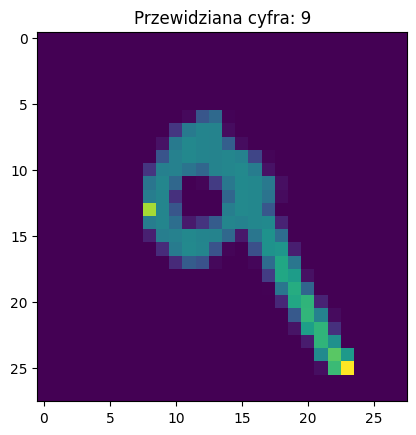

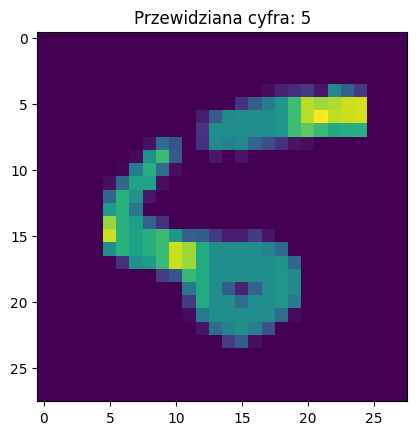

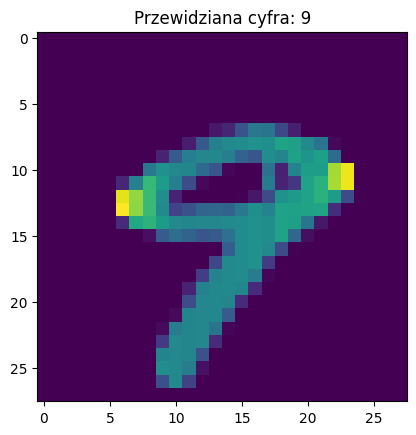

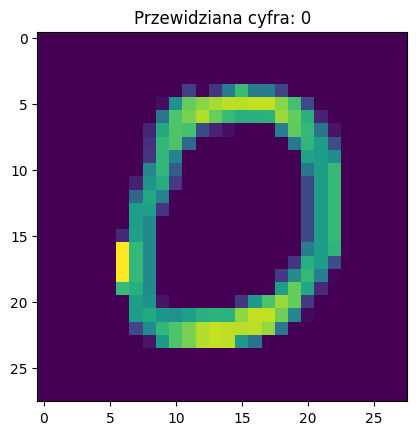

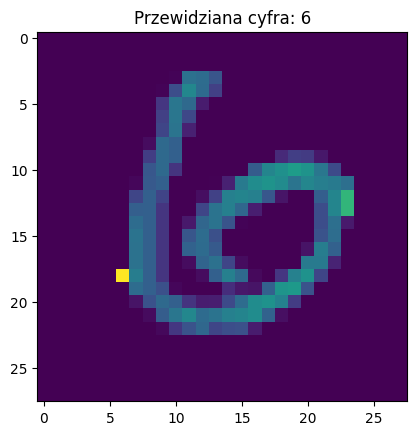

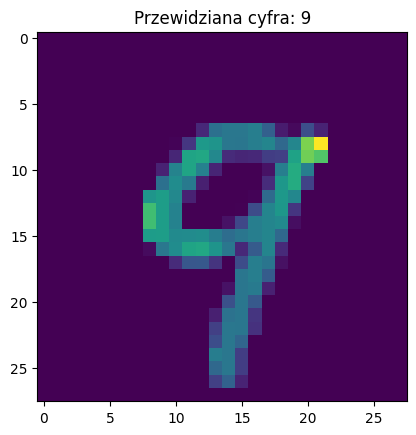

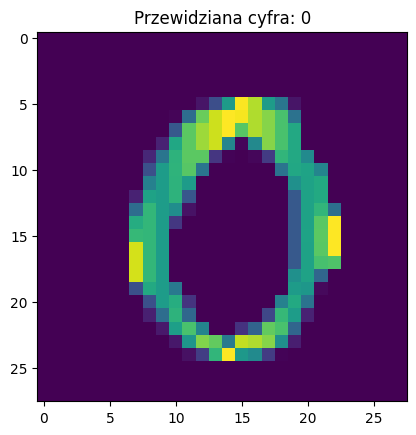

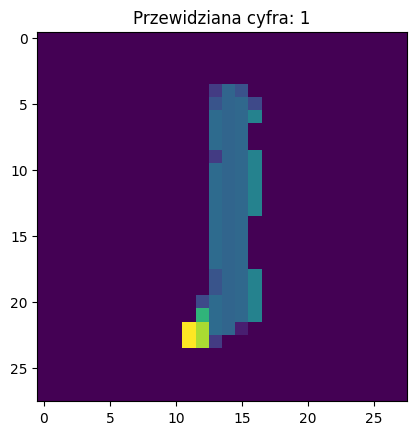

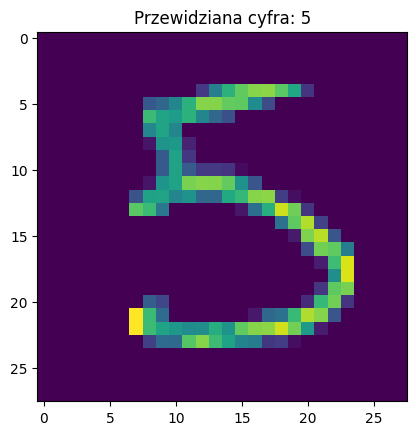

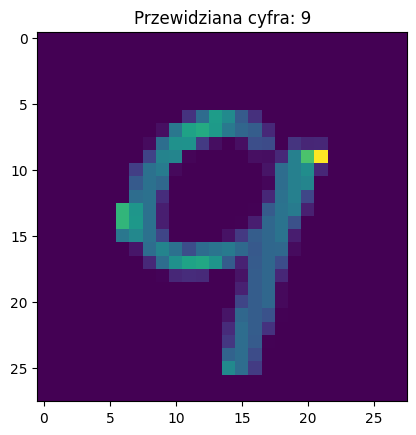

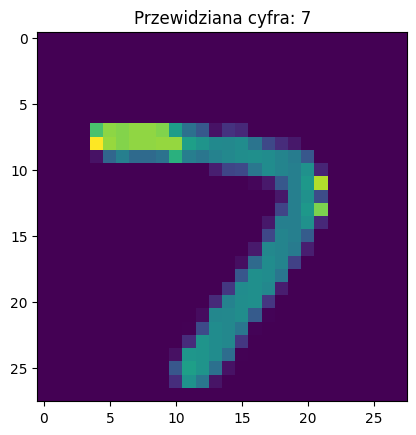

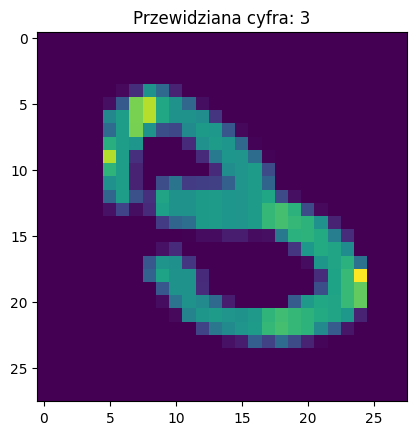

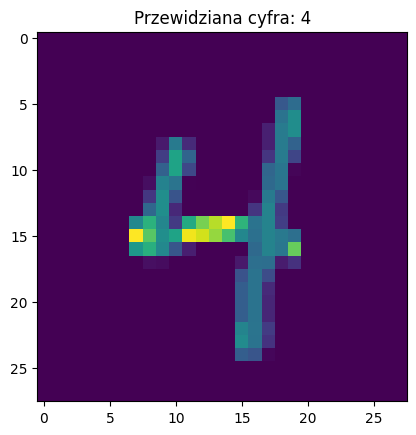

In [63]:
for x in range(0, 20):
      plt.title(f"Przewidziana cyfra: {np.argmax(predict[x])}")
      plt.imshow(x_test[x])
      plt.show()

# Jak widać, po stworzeniu NN z kilkoma warstwami oraz większą liczbą neuronów na warstwe wyniki znacznie się poprawiają


In [ ]:
(x_trainUN, y_trainUN), (x_testUN, y_testUN) = tf.keras.datasets.mnist.load_data()

# UN w tym wypadku oznacza UnNormalizde, będę teraz sprawdzać jak brak normalizacji danych wpływa na dokładność modelu

In [67]:
unmodel = tf.keras.models.Sequential()
unmodel.add(tf.keras.layers.Flatten())
unmodel.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
unmodel.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
unmodel.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
unmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
unmodel.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8622 - loss: 0.4718
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1109
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9787 - loss: 0.0704


In [68]:
val_loss, val_acc = unmodel.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.1039
0.09360785782337189 0.9706000089645386


# Po tym teście wnioskuje że w danym problemie normalizacja danych nie ma szczególnego wpływu na dokładność naszych predykcji
Rzecz która najbardziej wpływa na dokładność naszego modelu jest liczba epok przy jego uczeniu